In [13]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)

In [5]:
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X) 

In [7]:
X = X.fillna({'Age':X.Age.median()}) #may upgraid (for female them median, for male them median)

In [8]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [10]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.125, 0.375, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.0625, 0.125, 'entropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.1875, 0.125, 'entropy = 0.477\nsamples = 400\nvalue = [359, 41]'),
 Text(0.375, 0.375, 'SibSp <= 2.5\nentropy = 0.924\nsamples = 162\nvalue = [107, 55]'),
 Text(0.3125, 0.125, 'entropy = 0.964\nsamples = 139\nvalue = [85, 54]'),
 Text(0.4375, 0.125, 'entropy = 0.258\nsamples = 23\nvalue = [22, 1]'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.625, 0.375, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.5625, 0.125, 'entropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(0.6875, 0.125, 'entropy = 0.141\nsamples = 100\nvalue = [2, 98]'),
 Text(0.875, 0.375, 'Fare <=

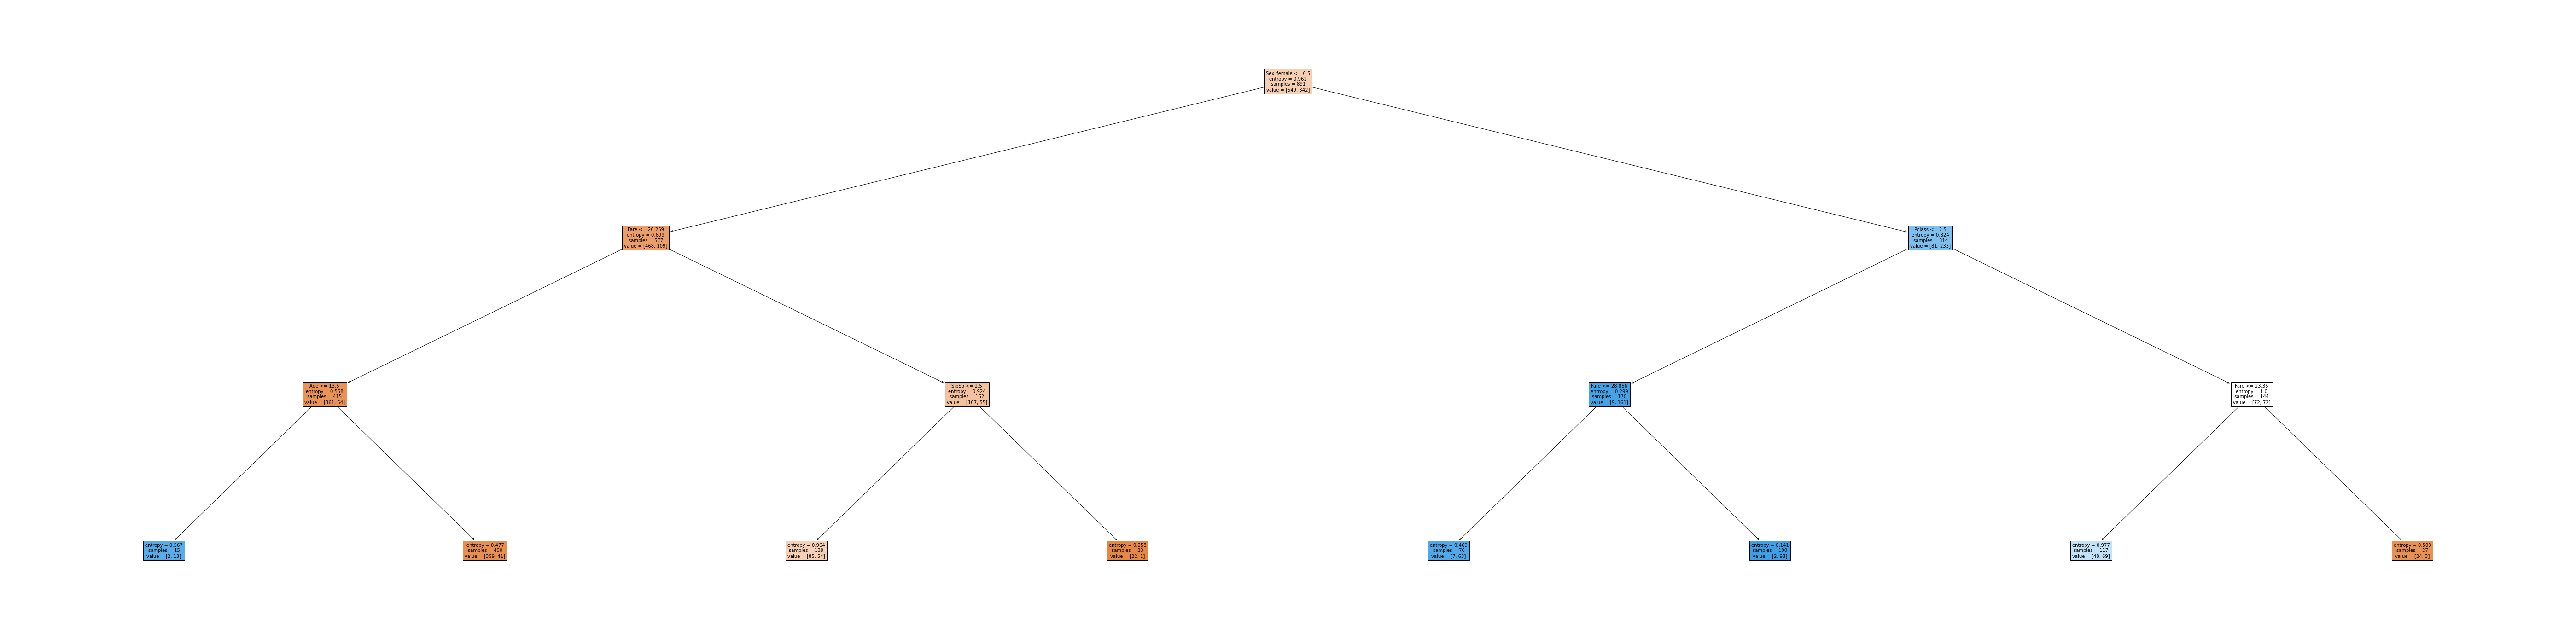

In [12]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True) #overtrain

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf.fit(X_train ,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
clf.score(X_train, y_train) # максимальная классификация на train выборке

0.8238255033557047

In [17]:
clf.score(X_test, y_test)

0.8203389830508474

In [18]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

In [19]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train ,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Vlaso\AppData\Local\Temp\ipykernel_19684\3673800541.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

In [20]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350


In [21]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score','cross_val_score'],
                           var_name='set_type', value_name='score') #replacing the cycle

In [22]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [23]:
scores_data_long.query('set_type == "cross_val_score"').head()

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350


<AxesSubplot:xlabel='max_depth', ylabel='score'>

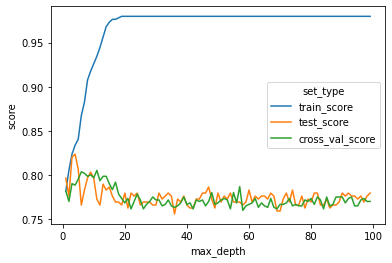

In [24]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [36]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [37]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8305084745762713